<a href="https://colab.research.google.com/github/lina-ba/Sentimentdataset_PreProcessing/blob/main/ProjectGMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('sentimentdataset.csv')

# **Exploration phase**

In [ ]:
df.shape

(732, 15)

In [ ]:
df.sample(3)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
421,422,426,Numbness sets in as the weight of loneliness g...,Loneliness,2021-02-12 16:45:00,SolitudeSeeker,Twitter,#Loneliness #HeavyHeart,18.0,35.0,Canada,2021,2,12,16
47,48,49,Reflecting on the beauty of nature. ...,Positive,2023-01-31 10:45:00,NatureLover,Facebook,#Nature #Reflection,15.0,30.0,Australia,2023,1,31,10
411,412,416,Giddy with excitement as the first snowflakes ...,Excitement,2020-12-02 17:30:00,SnowfallEnthusiast,Twitter,#Excitement #SnowfallMagic,22.0,45.0,Canada,2020,12,2,17


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [ ]:
# df.drop(['Unnamed: 0.1','Unnamed: 0'],inplace=True,axis=1)

In [ ]:
df['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [ ]:
emotion_dict = {
    'Positive':'Positive',
    'Negative':'Negative',
    'Neutral':'Neutral',
    'Anger':'Negative',
    'Fear':'Negative',
    'Sadness':'Negative',
    'Disgust':'Negative',
     'Happiness':'Positive',
     'Joy':'Positive',
     'Love':'Positive',
     'Amusement':'Positive',
     'Enjoyment':'Positive',
       'Admiration':'Positive',
     'Affection':'Positive',
     'Awe':'Negative',
     'Disappointed':'Negative',
     'Surprise':'Neutral',
       'Acceptance':'Positive',
     'Adoration':'Positive',
     'Anticipation':'Positive',
     'Bitter':'Negative',
     'Calmness':'Neutral',
     'Confusion':'Negative',
     'Excitement':'Positive',
     'Kind':'Positive',
     'Pride':'Positive',
     'Shame':'Negative',
     'Elation':'Positive',
      'Euphoria':'Positive',
     'Contentment':'Positive',
     'Serenity':'Positive',
     'Gratitude':'Positive',
     'Hope':'Positive',
      'Empowerment':'Positive',
     'Compassion':'Positive',
     'Tenderness':'Positive',
     'Arousal':'Positive',
     'Enthusiasm':'Positive',
       'Fulfillment':'Positive',
     'Reverence':'Neutral',
     'Despair':'Negative',
     'Grief':'Negative',
     'Loneliness':'Negative',
       'Jealousy':'Negative',
     'Resentment':'Negative',
     'Frustration':'Negative',
     'Boredom':'Negative',
     'Anxiety':'Negative',
    'Intimidation':'Negative',
     'Helplessness':'Negative',
     'Envy':'Negative',
     'Regret':'Negative',
     'Curiosity':'Neutral',
      'Indifference':'Negative',
     'Numbness':'Negative',
     'Melancholy':'Negative',
     'Nostalgia':'Neutral',
      'Ambivalence':'Negative',
     'Determination':'Positive',
     'Zest':'Positive',
     'Hopeful':'Positive',
     'Proud':'Positive',
      'Grateful':'Positive',
     'Empathetic':'Positive',
     'Compassionate':'Positive',
     'Playful':'Positive',
       'Free-spirited':'Positive',
     'Inspired':'Positive',
     'Confident':'Positive',
     'Bitterness':'Negative',
     'Yearning':'Negative',
       'Fearful':'Negative',
     'Apprehensive':'Negative',
     'Overwhelmed':'Negative',
     'Jealous':'Negative',
     'Devastated':'Negative',
       'Frustrated':'Negative',
     'Envious':'Negative',
     'Dismissive':'Negative',
     'Thrill':'Positive',
     'Bittersweet':'Neutral',
       'Overjoyed':'Positive',
     'Inspiration':'Positive',
     'Motivation':'Positive',
     'Contemplation':'Positive',
       'JoyfulReunion':'Positive',
     'Satisfaction':'Positive',
     'Blessed':'Positive',
     'Reflection':'Positive',
       'Appreciation':'Positive',
     'Confidence':'Positive',
     'Accomplishment':'Positive',
     'Wonderment':'Positive',
       'Optimism':'Positive',
    'Enchantment':'Positive',
    'Intrigue':'Positive',
    'PlayfulJoy':'Positive',
    'Mindfulness':'Neutral',
       'DreamChaser':'Positive',
     'Elegance':'Neutral',
    'Whimsy':'Negative',
    'Pensive':'Positive',
    'Harmony':'Positive',
       'Creativity':'Positive',
    'Radiance':'Neutral',
    'Wonder':'Positive',
    'Rejuvenation':'Positive',
    'Coziness':'Positive',
       'Adventure':'Positive',
     'Melodic':'Positive',
     'FestiveJoy':'Positive',
     'InnerJourney':'Neutral',
     'Freedom':'Positive',
       'Dazzle':'Positive',
    'Adrenaline':'Positive',
    'ArtisticBurst':'Positive',
    'CulinaryOdyssey':'Positive',
       'Resilience':'Positive',
    'Immersion':'Neutral',
    'Spark':'Positive',
    'Marvel':'Positive',
    'Heartbreak':'Negative',
       'Betrayal':'Negative',
     'Suffering':'Negative',
    'EmotionalStorm':'Negative',
    'Isolation':'Negative',
       'Disappointment':'Negative',
     'LostLove':'Negative',
     'Exhaustion':'Negative',
    'Sorrow':'Negative',
    'Darkness':'Negative',
       'Desperation':'Negative',
     'Ruins':'Negative',
     'Desolation':'Negative',
     'Loss':'Negative',
    'Heartache':'Negative',
       'Solitude':'Positive',
     'Positivity':'Positive',
    'Kindness':'Positive',
    'Friendship':'Positive',
    'Success':'Positive',
       'Exploration':'Positive',
     'Amazement':'Positive',
     'Romance':'Positive',
    'Captivation':'Positive',
       'Tranquility':'Positive',
     'Grandeur':'Positive',
    'Emotion':'Neutral',
    'Energy':'Positive',
    'Celebration':'Positive',
       'Charm':'Positive',
     'Ecstasy':'Positive',
    'Colorful':'Positive',
    'Hypnotic':'Neutral',
    'Connection':'Positive',
    'Iconic':'Positive',
       'Journey':'Neutral',
    'Engagement':'Positive',
    'Touched':'Positive',
    'Suspense':'Neutral',
    'Triumph':'Positive',
       'Heartwarming':'Positive',
     'Obstacle':'Negative',
     'Sympathy':'Positive',
     'Pressure':'Negative',
       'Renewed Effort':'Positive',
    'Miscalculation':'Negative',
    'Challenge':'Neutral',
    'Solace':'Negative',
       'Breakthrough':'Positive',
     'Joy in Baking':'Positive',
     'Envisioning History':'Positive',
       'Imagination':'Neutral',
     'Vibrancy':'Positive',
     'Mesmerizing':'Positive',
     'Culinary Adventure':'Positive',
       'Winter Magic':'Positive',
    'Thrilling Journey':'Positive',
    "Nature's Beauty":'Positive',
       'Celestial Wonder':'Positive',
    'Creative Inspiration':'Positive',
    'Runway Creativity':'Positive',
       "Ocean's Freedom":'Positive',
     'Whispers of the Past':'Negative',
     'Relief':'Positive',
     'Embarrassed':'Negative',
       'Mischievous':'Negative',
    'Sad':'Negative',
    'Hate':'Negative',
    'Bad':'Negative',
    'Happy':'Positive'
}


In [ ]:
def get_titles():
    # Step 1: remove extra spaces
    df['Feeling'] = df['Sentiment'].str.strip()

    # Step 2: map to emotion_dict (e.g., Positive/Negative)
    df['Feeling'] = df['Feeling'].map(emotion_dict)

    return df

# Call the function
get_titles()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Feeling
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Positive
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Negative
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Positive
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Positive
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,Positive
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,Positive
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,Positive
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,Positive


In [ ]:
df['Feeling'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df.duplicated()].index

Index([], dtype='int64')

In [ ]:
df.drop(df[df.duplicated()].index,inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
round(df.nunique()/df.shape[0]*100,2)

,0
Unnamed: 0.1,100.00
Unnamed: 0,100.00
Text,96.58
Sentiment,38.11
Timestamp,93.31
User,93.58
Platform,0.55
Hashtags,95.22
Retweets,3.55
Likes,5.19


In [ ]:
df['Platform'].unique()

array([' Twitter  ', ' Instagram ', ' Facebook ', ' Twitter '],
      dtype=object)

In [ ]:
df['Platform']=df['Platform'].replace( {
    ' Twitter  ':'Twitter',
    ' Twitter ':'Twitter'})


In [ ]:
df['Platform'].unique()

array(['Twitter', ' Instagram ', ' Facebook '], dtype=object)

In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
...,...
Triumph,1
Heartwarming,1
Obstacle,1


In [ ]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Feeling
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Positive
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Negative


In [ ]:
# df['hour']=df['Timestamp'].map(lambda hour:hour.split(' ')[1].split(' ')[0].strip())

Data transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
 15  Feeling       732 non-null    object 
dtypes: float64(2), int64(6), object(8)
memory usage: 91.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Text']=le.fit_transform(df['Text'])
df['Sentiment']=le.fit_transform(df['Sentiment'])
df['Timestamp']=le.fit_transform(df['Timestamp'])
df['User']=le.fit_transform(df['User'])
df['Platform']=le.fit_transform(df['Platform'])
df['Hashtags']=le.fit_transform(df['Hashtags'])
df['Country']=le.fit_transform(df['Country'])
df['Feeling']=le.fit_transform(df['Feeling'])

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Feeling
0,0,0,105,214,401,645,2,491,15.0,30.0,106,2023,1,15,12,2
1,1,1,293,195,400,118,2,674,5.0,10.0,20,2023,1,15,8,0
2,2,2,191,214,402,226,1,309,20.0,40.0,108,2023,1,15,15,2
3,3,3,120,214,403,7,0,677,8.0,15.0,91,2023,1,15,18,2
4,4,4,296,197,405,90,1,158,12.0,25.0,0,2023,1,15,19,1


Visualization

<Axes: >

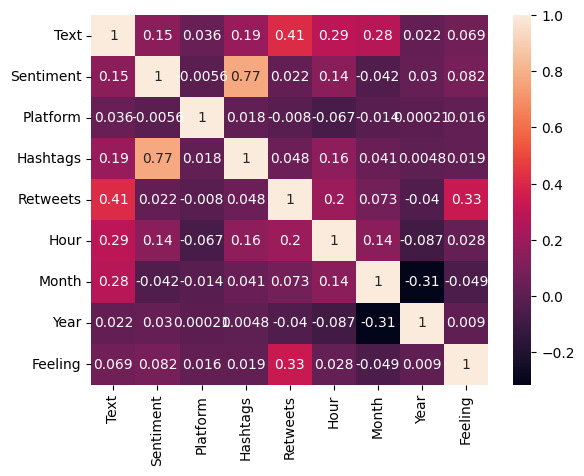

In [ ]:
import seaborn as sns
features=df[['Text','Sentiment','Platform','Hashtags','Retweets','Hour','Month','Year','Feeling']]
sns.heatmap(features.corr(),annot=True)

<Axes: xlabel='Hashtags', ylabel='Sentiment'>

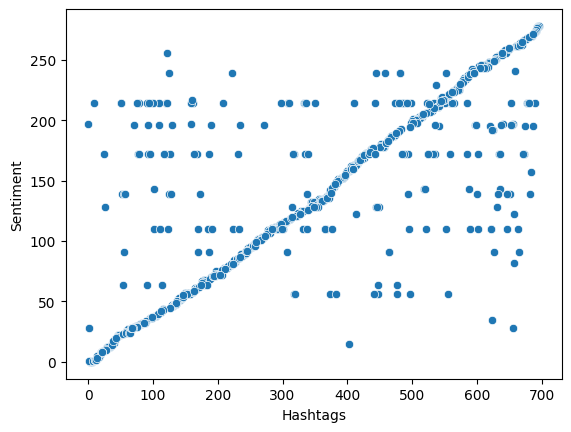

In [ ]:
sns.scatterplot(df,x='Hashtags',y='Sentiment')

<Axes: xlabel='Sentiment', ylabel='Feeling'>

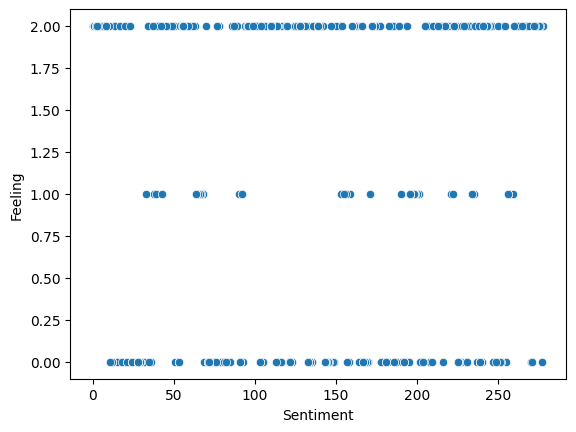

In [ ]:
sns.scatterplot(df,x='Sentiment',y='Feeling')

<Axes: xlabel='Retweets', ylabel='Feeling'>

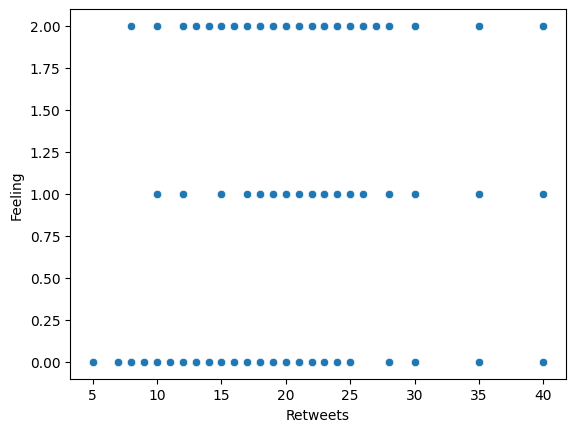

In [ ]:
sns.scatterplot(df,x='Retweets',y='Feeling')

<Axes: xlabel='Text', ylabel='Sentiment'>

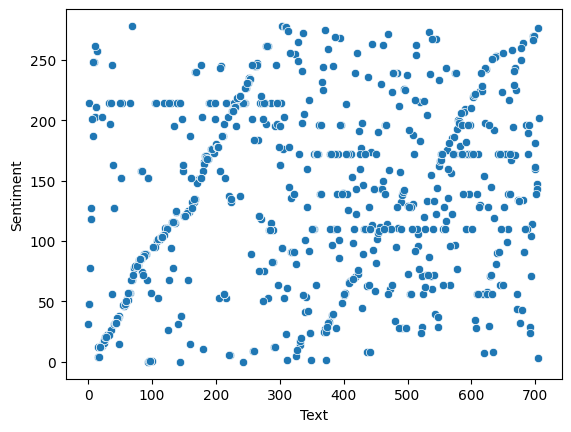

In [ ]:
sns.scatterplot(df,x='Text',y='Sentiment')

<Axes: xlabel='Hashtags', ylabel='Sentiment'>

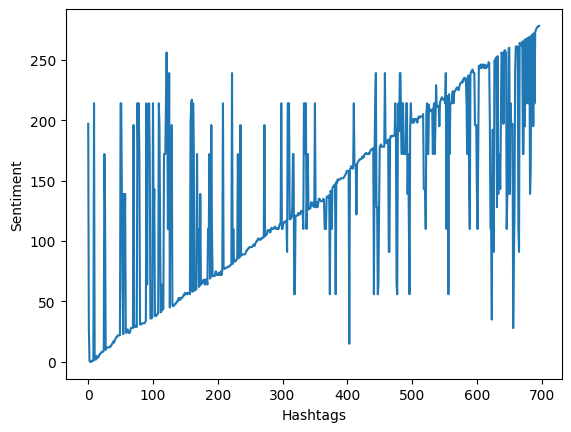

In [ ]:
sns.lineplot(df,x='Hashtags',y='Sentiment')

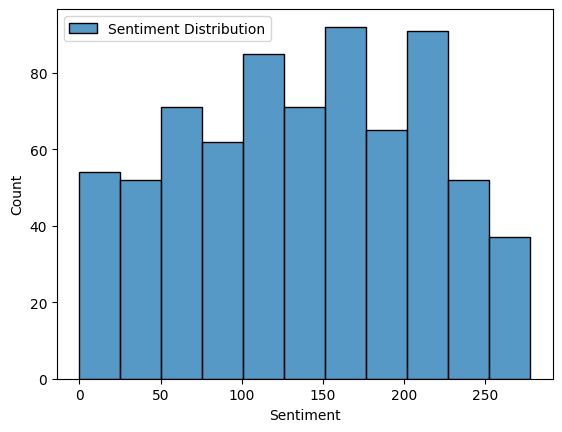

In [ ]:
import matplotlib.pyplot as plt

sns.histplot(df['Sentiment'], label='Sentiment Distribution')
plt.xlabel("Sentiment")
plt.legend()  # Adds the legend to the plot
plt.show()

([<matplotlib.patches.Wedge at 0x7e822ac33a50>,
 [Text(0.4918031900370928, 0.9839357815779135, '2'),
  Text(-1.0926229340845575, -0.1271814605689554, '1'),
  Text(0.6022667636424717, -0.9204752823469099, '0')],
 [Text(0.26825628547477787, 0.5366922444970437, '35.25%'),
  Text(-0.595976145864304, -0.06937170576488476, '33.20%'),
  Text(0.32850914380498447, -0.502077426734678, '31.56%')])

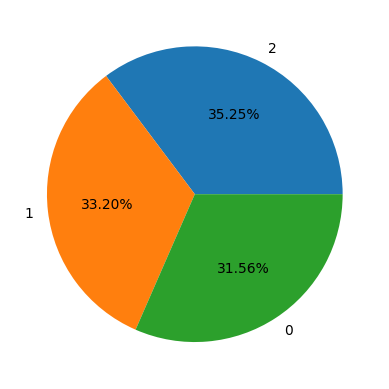

In [ ]:
plt.pie(df['Platform'].value_counts(),autopct='%1.2f%%',labels=df['Platform'].unique())

([<matplotlib.patches.Wedge at 0x7e822ac00a90>,
 [Text(-0.33002591005212206, 1.0493249728726886, '2'),
  Text(-0.009441771194619896, -1.0999594778703026, '0'),
  Text(1.046453552993086, -0.3390205914515317, '1')],
 [Text(-0.1800141327557029, 0.5723590761123756, '59.70%'),
  Text(-0.005150057015247216, -0.599977897020165, '30.33%'),
  Text(0.5707928470871378, -0.18492032260992636, '9.97%')])

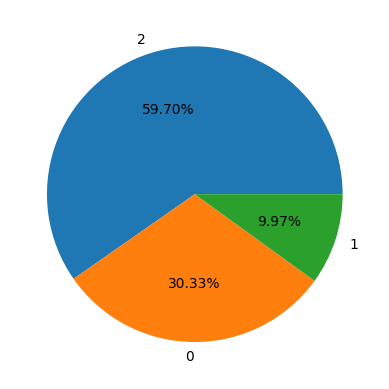

In [ ]:
plt.pie(df['Feeling'].value_counts(),autopct='%1.2f%%',labels=df['Feeling'].unique())

In [ ]:
df['Sentiment'].unique()

array([214, 195, 197,  15, 115, 240,  83, 137, 173, 184,  13, 100,   4,
         9,  26,  80, 257,   0,   6,  16,  31,  38,  52, 111, 176, 218,
       248,  51, 110, 247,  89, 109,  57, 245, 132, 151,  95,  47, 261,
        22, 102, 124, 235,  46, 125, 234,  88,  75, 135, 180, 170, 231,
       123,  36,  19, 165, 149, 105, 227,  84,  74, 178, 122,  18, 164,
       148, 169,  68, 158,  53, 203, 187, 201,  12,   1,  78, 246, 202,
       278,  56, 152, 220, 127,  94,  48, 211, 118, 163,  50, 243,  64,
        11,  72,  32, 277, 116,  21, 208, 168,  79, 121, 103,  85,  27,
        77, 200, 264,  39, 209, 130,  33,  67,   5, 207, 162, 193,  14,
        55, 175, 112, 242,  34,  17, 224, 199,  20,  49, 258,   2, 276,
       206, 219, 138,  66,  97, 166, 212, 190,  86,  90, 270, 210, 263,
       141,  61, 221, 274, 228, 160,  58, 129,   8, 107,  25, 188, 117,
       159, 119,  70,   7, 142,  23, 222, 275, 161,  63, 108,  65, 233,
       156, 198, 253, 131, 185, 244, 146, 179, 134,  73,  30, 25

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Feeling
0,0,0,105,214,401,645,2,491,15.0,30.0,106,2023,1,15,12,2
1,1,1,293,195,400,118,2,674,5.0,10.0,20,2023,1,15,8,0
2,2,2,191,214,402,226,1,309,20.0,40.0,108,2023,1,15,15,2
3,3,3,120,214,403,7,0,677,8.0,15.0,91,2023,1,15,18,2
4,4,4,296,197,405,90,1,158,12.0,25.0,0,2023,1,15,19,1


<Axes: ylabel='Text'>

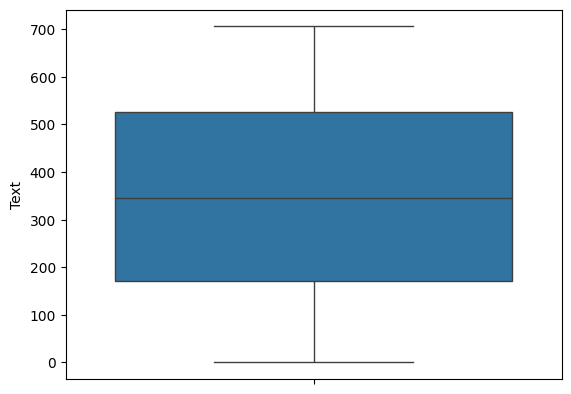

In [ ]:
#detecting outliers
sns.boxplot(df['Text'])

In [ ]:
import numpy as np
from scipy import stats
zscore=np.abs(stats.zscore(df['Sentiment']))
outliers=df[zscore>3]
outliers

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Feeling


splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x=df.drop(['Unnamed: 0.1','Unnamed: 0','Feeling'],inplace=False,axis=1)
y=df['Feeling']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(585, 13)

In [ ]:
x_test.shape

(147, 13)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
from sklearn.metrics import accuracy_score
y_predict=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test,y_predict))

Accuracy: 0.6394557823129252


In [ ]:
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2])

In [ ]:
y_test

,Feeling
604,1
33,2
300,0
457,0
634,2
...,...
70,1
192,0
328,0
165,0


In [ ]:
y_test
type(y_test)

pandas.core.series.Series

In [ ]:
# ypred=pd.Series(y_predict)

In [ ]:
# from sklearn.metrics import accuracy_score
# print('Accuracy:', accuracy_score(y_test, y_predict))

In [ ]:
# from sklearn.metrics import r2_score
# print(r2_score(y_test,y_predict))

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knnModel=KNeighborsClassifier(n_neighbors=29)
knnModel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
predict=knnModel.predict(x_test)

In [ ]:
print('accuracy...',accuracy_score(y_test,predict))

accuracy... 0.6190476190476191


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [1, 3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(metric='cosine'), params, cv=5)
grid.fit(x_train, y_train)
print("Best K:", grid.best_params_)

Best K: {'n_neighbors': 9}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_test,predict))
# print(classification_report(y_test,predict))

In [ ]:
# print(r2_score(y_test,predict))

In [ ]:
#finding the best k
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Try k values from 1 to 20
k_values = range(1, 30)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    accuracies.append(score)


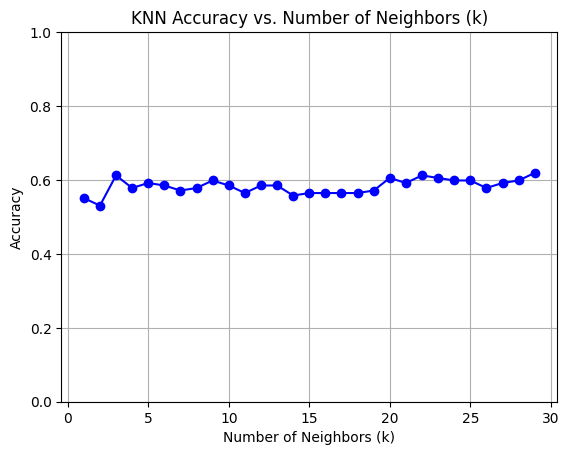

In [ ]:
# Line plot
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.grid(True)
plt.show()

In [ ]:
#decision tree
#random forest
#svc

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clef=DecisionTreeClassifier()
tree_clef.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
predictD=tree_clef.predict(x_test)

In [ ]:
print('accuracy...',accuracy_score(y_test,predictD))

accuracy... 0.7482993197278912


In [ ]:
# print(r2_score(y_test,predictD))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=14,max_features=5)
rf_clf.fit(x_train,y_train)


RandomForestClassifier(max_features=5, n_estimators=14)

In [ ]:
predictF=rf_clf.predict(x_test)

In [ ]:
print('accuracy...',rf_clf.score(x_test,y_test))

accuracy... 0.673469387755102


In [ ]:
# print(r2_score(y_test,predictF))

SVM

In [ ]:
#scalling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(x_train)
# X_test_scaled = scaler.transform(x_test)

In [ ]:
#svc

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.metrics import accuracy_score

In [ ]:
linear_clf = LinearSVC(random_state=42, max_iter=10000)
linear_clf.fit(x_train , y_train)
y_pred_linear = linear_clf.predict(x_test)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"LinearSVC Accuracy: {acc_linear:.2f}") #meme accuracy que sans scalling donc le reste n5alih 3al normale

LinearSVC Accuracy: 0.65


In [ ]:
rbf_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf_clf.fit(x_train, y_train)
y_pred_rbf = rbf_clf.predict(x_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"SVC (RBF) Accuracy: {acc_rbf}")

SVC (RBF) Accuracy: 0.564625850340136


In [ ]:
poly_clf = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
poly_clf.fit(x_train, y_train)
y_pred_poly = poly_clf.predict(x_test)
acc_poly = accuracy_score(y_test, y_pred_poly)
print(f"SVC (Poly) Accuracy: {acc_poly}")


SVC (Poly) Accuracy: 0.564625850340136


In [ ]:
#habich yi5dim

In [ ]:
#tab ytest et ypredict ma3 ahsan wa7id w a3mal

In [ ]:
x_test['y_test']=y_test
x_test['y_predict']=predictD
# Remove the added columns before using x_test for scoring
x_test = x_test.drop(['y_test', 'y_predict'], axis=1)
x_test

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
604,475,64,557,19,0,53,22.0,45.0,17,2023,6,13,14
33,142,214,435,676,1,410,25.0,50.0,114,2023,1,26,9
300,131,116,369,411,0,303,18.0,36.0,47,2022,5,12,2
457,315,145,175,582,2,378,22.0,45.0,11,2019,4,18,11
634,360,172,588,535,1,25,35.0,70.0,87,2023,7,13,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,146,38,479,682,2,105,15.0,30.0,50,2023,2,18,9
192,185,169,135,459,0,425,8.0,15.0,111,2018,8,5,16
328,115,103,289,184,2,270,20.0,40.0,101,2021,1,15,22
165,200,180,216,566,0,452,10.0,20.0,95,2019,11,18,21


In [ ]:
nR=[[475,64,557,19,0,53,22.0,45.0,17,2023,6,13,14]]
pre=tree_clef.predict(nR)
print("the predicted sentiment :",pre)

the predicted sentiment : [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


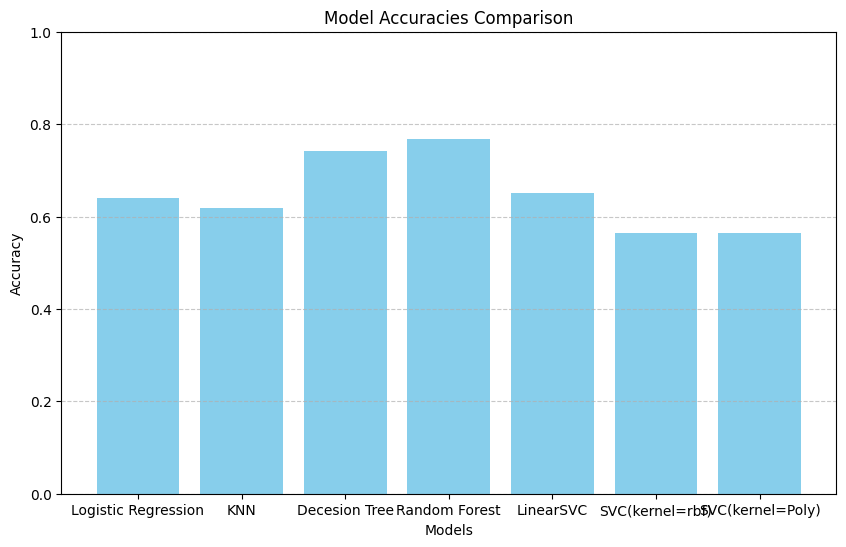

In [ ]:
import matplotlib.pyplot as plt

# Data
model_names = ['Logistic Regression','KNN', 'Decesion Tree', 'Random Forest','LinearSVC' ,'SVC(kernel=rbf)' , 'SVC(kernel=Poly)']
accuracies = [0.6394557823129252,0.6190476190476191,0.7414965986394558,0.7687074829931972, 0.65,0.564625850340136,0.564625850340136]

# Plot
plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#habich yi5dim

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC, SVC, NuSVC
# Step 3: Define the Parameter Grid
# param_grid = {
#     'C': [0.1, 1, 5, 10],
#     'gamma': [0.001, 0.01, 0.1, 1],
#     'kernel': ['linear', 'rbf']
# }

# Step 4: Set up the Grid Search
#verbose=0: Controls the verbosity (logging level) of the grid search output. 0 means no additional output.
#cv=5: Uses 5-fold cross-validation. The training set is split into 5 folds; the model is trained on 4 folds and validated on the remaining 1 fold, repeating this 5 times.
# grid = GridSearchCV(SVC(), param_grid, verbose=0, cv=5)

# Step 5: Fit the Grid Search on the Training Data
# grid.fit(x_train, y_train)

# Step 6: Print the Best Parameters Found
# print("Best Parameters Found:", grid.best_params_)

# Step 7: Evaluate on the Test Set
# y_predi = grid.predict(x_test)
# cm = confusion_matrix(y_test, y_predi)
# acc = accuracy_score(y_test, y_predi)

# print("Confusion Matrix:")
# print(cm)
# print(f"Accuracy: {acc*100:.2f}%")